### Before entering the "Going Deeper" session in Aiffel, this is a small warmup to prepare myself for the CV course.

### In this small project, I will practice the concept of face detection with cv2 and dlib

Step 1: Get a sticker(png. file) to attach to my selfy

Step 2: Face detection through landmarks 
        --> Use dlib to create a bounding box pinpoint landmarks over my face

Step 3: Find the exact landmark where I will attach my sticker

Step 4: Attach the sticker onto my selfy

Step 5: Try to find the problem

## 1: Import image

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


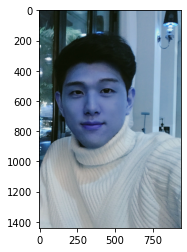

In [11]:
selfy_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/남양주카페.jpg'
selfy = cv2.imread(selfy_path) # Summon picture through cv2.imread
selfy_show = selfy.copy() # Copy and save the image separately
plt.imshow(selfy)
plt.show()

### Reminder: The basis of opencv is BGR. We must always convert it to RGB.

explanation on cv2:
https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html

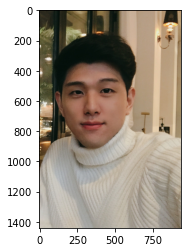

In [18]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # using cv2.cvtColor to convert BGR 2 RGB
plt.imshow(img_rgb)
plt.show()

## Step 2: Face detection and landmarks

* dlib uses HOG(Histogram of Oriented Gradients) and SVM(Support Vector Machine) in order the initialize face detection
* I will use the hog detector offered by dlib

In [16]:
detector_hog = dlib.get_frontal_face_detector()


In [17]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

## Creating a bounding box (dlib.rectangles)

rectangles[[(142, 400) (605, 862)]]


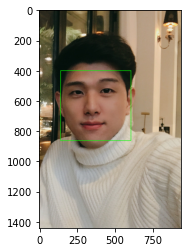

In [19]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- dlib.rectangles: http://dlib.net/python/index.html#dlib.rectangles

### face landmark

face landmark localization will detect the points of the nose, eyes, and mouth (object keypoint estimation --> top-down, bottom-up)

it will further crop the bounding box in the picture

### uploading the landmark model

In [21]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

# the landmark predictor will recieve the RGB file and dlib.rectangle as input and return dlib.full_object_detection

🌫🛸


In [23]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


### I will print the landmarks on my selfy

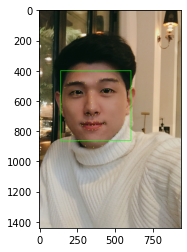

In [25]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3: Finding the location where I want to attach a beard sticker

### Location of sticker = 
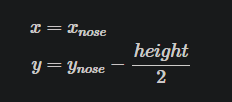

### Size of sticker
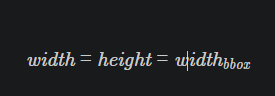

In [28]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # index for the nose is 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(346, 650)
(x,y) : (346,419)
(w,h) : (464,464)


#### The location of the middle of the nose is set at (346, 419)

In [ ]:
## Step 4: 

In [29]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(464, 464, 3)


In [30]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (114,-45)


In [31]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (114,0)


In [32]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


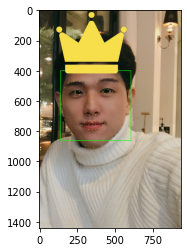

In [33]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()